In [23]:
import pandas as pd

In [24]:
# Load the dataset
file_path = "openafrica-_-malaria-_-national_unit-data-raw-national_unit-data.csv.csv"
df = pd.read_csv(file_path)


In [25]:
# Step 1: Filter only relevant metrics (Incidence Rate and Mortality Rate)
filtered_df = df[df["Metric"].isin(["Incidence Rate", "Mortality Rate"])]

In [26]:
# Step 2: Pivot data so each row = country + year, with separate columns for each metric
pivot_df = filtered_df.pivot_table(
    index=["ISO3", "Name", "Year"],
    columns="Metric",
    values="Value"
).reset_index()

In [27]:
# Step 3: Rename columns just in case
pivot_df.columns.name = None  # Remove pandas-generated name for columns
pivot_df.rename(columns={
    "Incidence Rate": "Incidence_Rate",
    "Mortality Rate": "Mortality_Rate"
}, inplace=True)

In [28]:
# Step 4: Ensure Year is integer
pivot_df["Year"] = pivot_df["Year"].astype(int)


In [29]:
# Step 5: Optional - check for missing values
print("Missing values per column:")
print(pivot_df.isnull().sum())

Missing values per column:
ISO3              0
Name              0
Year              0
Incidence_Rate    0
Mortality_Rate    0
dtype: int64


In [30]:
# Final preview
print("\nCleaned Data Sample:")
print(pivot_df.head())


Cleaned Data Sample:
  ISO3         Name  Year  Incidence_Rate  Mortality_Rate
0  AFG  Afghanistan  2010        1.176667        1.130839
1  AFG  Afghanistan  2011        1.053869        1.169705
2  AFG  Afghanistan  2012        0.213129        0.255330
3  AFG  Afghanistan  2013        0.367701        0.380515
4  AFG  Afghanistan  2014        0.653501        0.684448


In [49]:
pivot_df.to_csv("malaria_cleaned.csv", index=False)


In [65]:
# Step 1: Load malaria cleaned data
malaria_df = pd.read_csv("malaria_cleaned.csv")

In [31]:
import matplotlib.pyplot as plt


In [66]:
# Step 2: Load downloaded country data
coords_df = pd.read_csv("countries.csv")


In [68]:
# Step 3: Merge malaria data with country coordinates using country name
merged_df = malaria_df.merge(
    coords_df,
    left_on="Name",     # column in malaria data
    right_on="name",    # column in countries.csv
    how="left"
)


In [70]:
# Step 4: Drop only the columns that actually exist in the DataFrame
columns_to_drop = [
    "name", "iso2", "iso3", "numeric_code", "phone_code", "capital", "currency",
    "currency_symbol", "tld", "native", "region", "subregion", "timezones", 
    "translations", "emoji", "emojiU", "id"
]


In [71]:
# Keep only columns that exist
columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]

In [72]:
# Drop them safely
merged_df.drop(columns=columns_to_drop, inplace=True)

In [73]:
merged_df.rename(columns={"latitude": "Latitude", "longitude": "Longitude"}, inplace=True)
merged_df.to_csv("malaria_cleaned_with_coords.csv", index=False)

In [74]:
# 🧼 Drop unnecessary columns safely
columns_to_drop = [
    "name", "iso2", "iso3", "numeric_code", "phone_code", "capital", "currency",
    "currency_symbol", "tld", "native", "region", "subregion", "timezones", 
    "translations", "emoji", "emojiU", "id"
]

In [75]:
# Drop only columns that exist in your DataFrame
columns_to_drop = [col for col in columns_to_drop if col in merged_df.columns]
merged_df.drop(columns=columns_to_drop, inplace=True)

In [76]:
# Rename for Power BI map fields
merged_df.rename(columns={"latitude": "Latitude", "longitude": "Longitude"}, inplace=True)

In [78]:
# Save to new file
merged_df.to_csv("malaria_cleaned_with_coords.csv", index=False)

print(" Done! my file 'malaria_cleaned_with_coords.csv' is ready.")

 Done! my file 'malaria_cleaned_with_coords.csv' is ready.


In [67]:
# Group by Year and calculate global averages
yearly_avg = pivot_df.groupby("Year")[["Incidence_Rate", "Mortality_Rate"]].mean()

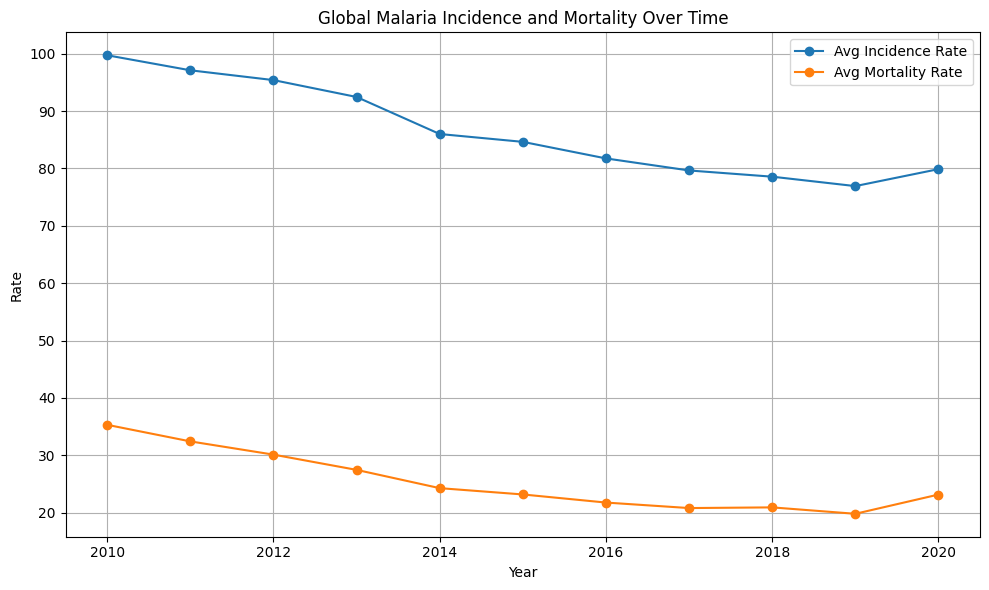

In [33]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg.index, yearly_avg["Incidence_Rate"], label="Avg Incidence Rate", marker='o')
plt.plot(yearly_avg.index, yearly_avg["Mortality_Rate"], label="Avg Mortality Rate", marker='o')
plt.title("Global Malaria Incidence and Mortality Over Time")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Get the most recent year
latest_year = pivot_df["Year"].max()

In [35]:
# Filter for that year
latest_data = pivot_df[pivot_df["Year"] == latest_year]

In [36]:
# Top 10 countries with highest incidence
top_incidence = latest_data.sort_values("Incidence_Rate", ascending=False).head(10)

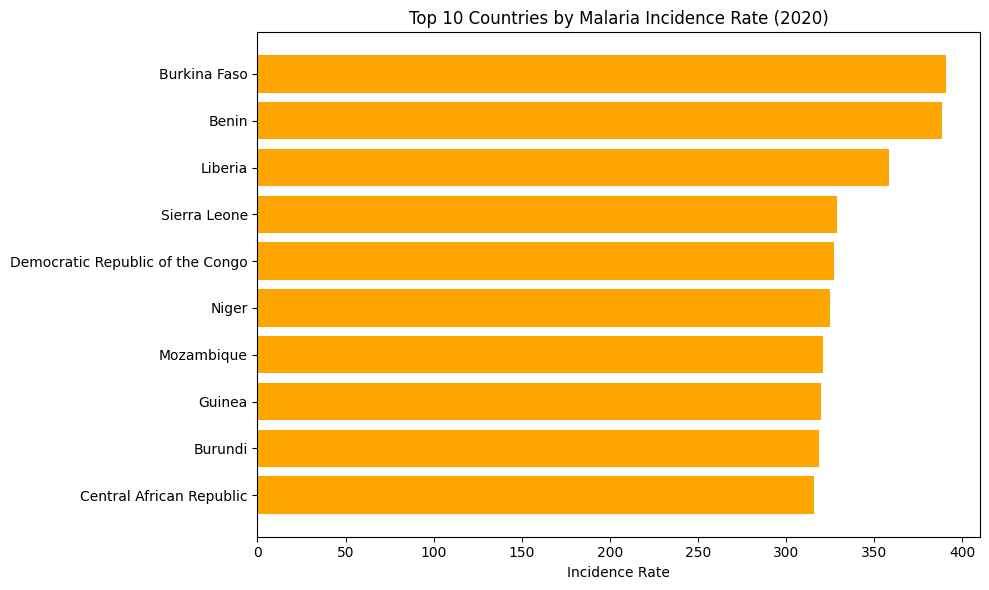

In [37]:
# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_incidence["Name"], top_incidence["Incidence_Rate"], color="orange")
plt.title(f"Top 10 Countries by Malaria Incidence Rate ({latest_year})")
plt.xlabel("Incidence Rate")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [38]:
import seaborn as sns

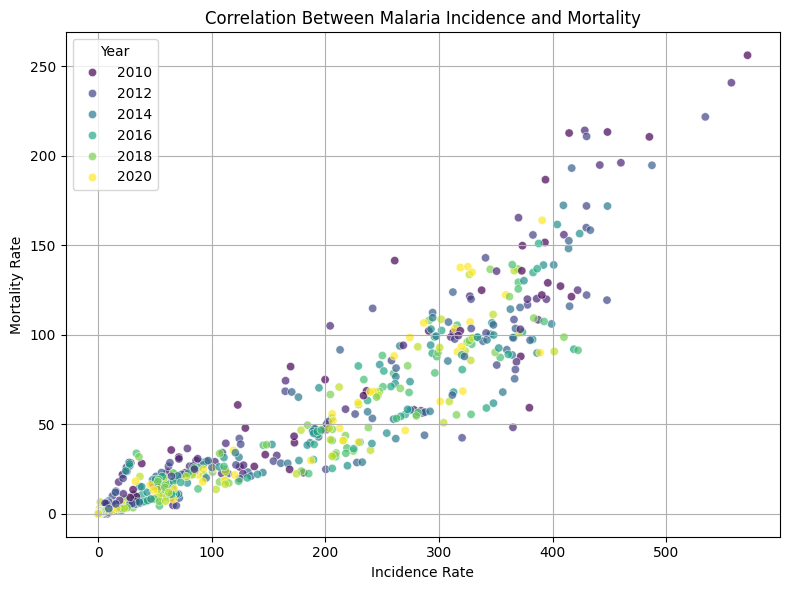

In [39]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pivot_df, x="Incidence_Rate", y="Mortality_Rate", hue="Year", palette="viridis", alpha=0.7)
plt.title("Correlation Between Malaria Incidence and Mortality")
plt.xlabel("Incidence Rate")
plt.ylabel("Mortality Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Example: Rwanda
country_data = pivot_df[pivot_df["Name"] == "Rwanda"]


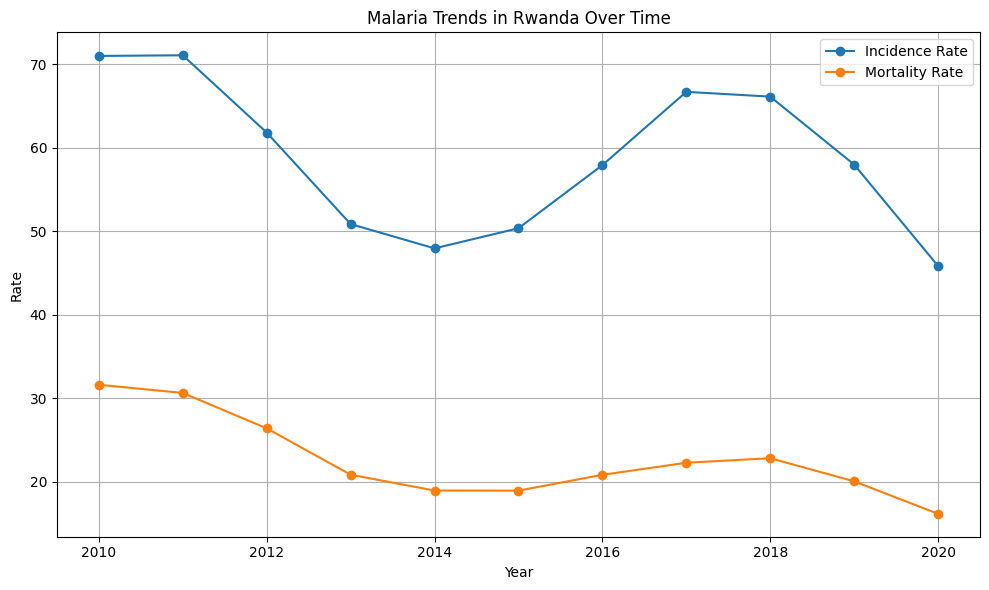

In [41]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(country_data["Year"], country_data["Incidence_Rate"], label="Incidence Rate", marker='o')
plt.plot(country_data["Year"], country_data["Mortality_Rate"], label="Mortality Rate", marker='o')
plt.title("Malaria Trends in Rwanda Over Time")
plt.xlabel("Year")
plt.ylabel("Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [50]:
pivot_df = pd.read_csv("malaria_cleaned.csv")


In [51]:
# Encode country names to numbers
le = LabelEncoder()
pivot_df["Country_Code"] = le.fit_transform(pivot_df["Name"])

In [52]:
# Select features and target
X = pivot_df[["Year", "Country_Code", "Mortality_Rate"]]
y = pivot_df["Incidence_Rate"]


In [53]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
# Make predictions
y_pred = model.predict(X_test)

In [56]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R²):", r2)

Mean Squared Error: 2160.516194660859
R-squared (R²): 0.8813679283338846


In [58]:
# Predict incidence rate in 2030 for Rwanda
rwanda_code = le.transform(["Rwanda"])[0]
future_data = pd.DataFrame({
    "Year": [2030],
    "Country_Code": [rwanda_code],
    "Mortality_Rate": [latest_data[latest_data["Name"] == "Rwanda"]["Mortality_Rate"].values[0]]
})

future_prediction = model.predict(future_data)
print("Predicted Malaria Incidence Rate in Rwanda (2030):", future_prediction[0])


Predicted Malaria Incidence Rate in Rwanda (2030): 80.27488366673424


In [59]:
# This saves the cleaned malaria data for Power BI
pivot_df.to_csv("malaria_cleaned.csv", index=False)


In [60]:
# Save actual vs predicted incidence rates
prediction_df = X_test.copy()
prediction_df["Actual_Incidence"] = y_test.values
prediction_df["Predicted_Incidence"] = y_pred
prediction_df.to_csv("malaria_predictions.csv", index=False)
